In [4]:
# We'll start with our library imports...
import pandas
import numpy as np                 # to use numpy arrays
import tensorflow as tf            # to specify and run computation graphs
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt    # to visualize data and draw plots
from tqdm import tqdm              # to track progress of loops
from keras.datasets import cifar100
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Dropout
from sklearn.utils import shuffle

In [5]:
train = tfds.load('cifar100', shuffle_files=True, split='train[:70%]', as_supervised=True)
validation = tfds.load('cifar100', shuffle_files=True, split='train[30%:]', as_supervised=True)


In [6]:
for example in train:
    print(example)
    print(example[0].numpy())
    print(example[1].numpy())
    break

(<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[151, 154, 145],
        [144, 147, 135],
        [141, 143, 134],
        ...,
        [ 44,  38,  39],
        [112, 100,  96],
        [145, 127, 120]],

       [[153, 156, 150],
        [141, 144, 135],
        [139, 142, 136],
        ...,
        [ 68,  59,  59],
        [131, 113, 106],
        [121, 101,  94]],

       [[163, 165, 161],
        [150, 153, 145],
        [147, 149, 144],
        ...,
        [ 75,  66,  60],
        [101,  86,  77],
        [ 83,  77,  73]],

       ...,

       [[150, 150, 162],
        [ 51,  52,  67],
        [ 46,  42,  56],
        ...,
        [ 60,  59,  48],
        [ 71,  73,  56],
        [ 58,  62,  44]],

       [[146, 158, 168],
        [ 92, 106, 116],
        [ 73,  77,  85],
        ...,
        [ 54,  55,  40],
        [ 59,  66,  41],
        [ 52,  56,  28]],

       [[ 92,  95, 105],
        [ 86,  90, 100],
        [ 77,  74,  82],
        ...,
        [ 59,  61,  44

In [7]:
(images, labels), (temp, temp1) = cifar100.load_data()
train_images, validation_images = images[:40000], images[40000:]
train_labels, validation_labels = labels[:40000], labels[40000:]


In [8]:
img_rows, img_cols, img_width = 32, 32, 3

  
train_images = train_images.astype('float32') 
validation_images = validation_images.astype('float32') 
images = images.astype('float32')
temp = temp.astype('float32')
images /= 255
train_images /= 255
validation_images /= 255
temp /= 255

In [9]:
print(train_labels.shape)
train_labels = keras.utils.to_categorical(train_labels)
print(train_labels.shape)
validation_labels_save = keras.utils.to_categorical(validation_labels)
temp1 = keras.utils.to_categorical(temp1)
#labels = keras.utils.to_categorical(labels)

(40000, 1)
(40000, 100)


In [10]:
input_shape = (img_rows, img_cols, img_width)

In [11]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:], activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)         

In [12]:
# using Sequential groups all the layers to run at once

optimizer = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 30)
history = model.fit(train_images, train_labels, batch_size = 32, epochs=1000, validation_data=(validation_images, validation_labels_save), callbacks = [es], shuffle=True, use_multiprocessing=(True))

Epoch 1/1000
1250/1250 [==============================] - 14s 11ms/step - loss: 4.8989 - accuracy: 0.0445 - val_loss: 4.0809 - val_accuracy: 0.1068
Epoch 2/1000
1250/1250 [==============================] - 6s 5ms/step - loss: 4.2074 - accuracy: 0.0915 - val_loss: 3.7572 - val_accuracy: 0.1640
Epoch 3/1000
1250/1250 [==============================] - 6s 5ms/step - loss: 3.9024 - accuracy: 0.1261 - val_loss: 3.5483 - val_accuracy: 0.1979
Epoch 4/1000
1250/1250 [==============================] - 6s 5ms/step - loss: 3.7012 - accuracy: 0.1540 - val_loss: 3.3793 - val_accuracy: 0.2311
Epoch 5/1000
1250/1250 [==============================] - 6s 5ms/step - loss: 3.5520 - accuracy: 0.1818 - val_loss: 3.2732 - val_accuracy: 0.2497
Epoch 6/1000
1250/1250 [==============================] - 6s 5ms/step - loss: 3.4162 - accuracy: 0.2048 - val_loss: 3.1503 - val_accuracy: 0.2751
Epoch 7/1000
1250/1250 [==============================] - 6s 5ms/step - loss: 3.3133 - accuracy: 0.2238 - val_loss: 3.0661

In [14]:
validation_evaluation = model.evaluate(validation_images, validation_labels_save)


313/313 [==============================] - 1s 2ms/step - loss: 1.8522 - accuracy: 0.5352


In [15]:
y_predict = model.predict(validation_images)

In [16]:
y_prediction_bin = np.array([])

for example in y_predict:
    maxN = example[0]
    ind = 0
    for i in range(1, 100):
        if example[i] > maxN:
            ind = i
            maxN = example[i]
    y_prediction_bin = np.append(y_prediction_bin, ind)

y_prediction_bin = y_prediction_bin.astype(int)
print(y_prediction_bin) 

[76  2 46 ... 43  8 73]


In [17]:
confusion_matrix = tf.math.confusion_matrix(validation_labels, y_prediction_bin)
print(confusion_matrix)

tf.Tensor(
[[71  0  1 ...  0  0  1]
 [ 1 77  0 ...  1  0  0]
 [ 1  1 49 ...  0  0  0]
 ...
 [ 0  0  0 ... 62  0  0]
 [ 0  0  6 ...  0 27  0]
 [ 0  0  0 ...  0  1 46]], shape=(100, 100), dtype=int32)


In [18]:
np.savetxt("HW1_brute_confusion_matrix.txt", confusion_matrix.numpy(), fmt='%03.d')

In [21]:
model.evaluate(temp, temp1)


313/313 [==============================] - 1s 2ms/step - loss: 1.8037 - accuracy: 0.5449


[1.8037372827529907, 0.5449000000953674]

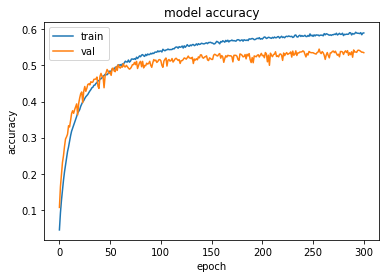

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

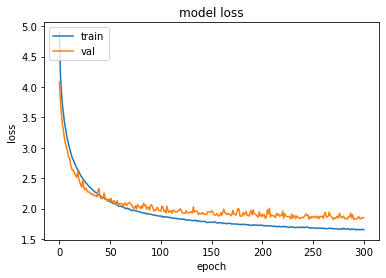

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
from math import sqrt

validation_data_error = 1 - validation_evaluation[1]
print(validation_data_error)

0.46480000019073486


In [33]:

lower_bound_interval = validation_data_error - 1.96 * sqrt( (validation_data_error * (1 - validation_data_error)) / len(validation_labels))
upper_bound_interval = validation_data_error + 1.96 * sqrt( (validation_data_error * (1 - validation_data_error)) / len(validation_labels))

print("The 95% Confidence interval for error hypothesis based on the normal distribution estimator: ", (lower_bound_interval, upper_bound_interval))

The 95% Confidence interval for error hypothesis based on the normal distribution estimator:  (0.4550243155395834, 0.47457568484188634)


In [31]:
tf.saved_model.save(model, 'homework1/cifar100-brute')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: homework1/cifar100-brute/assets


INFO:tensorflow:Assets written to: homework1/cifar100-brute/assets
